In [ ]:
## these are the necessary imports 

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction as fr


plt.rcParams['figure.figsize'] = [10, 10]


In [ ]:
## distance to the red axis of pt 
def dr(pt):
    dist = -(-np.sqrt(3)*pt[0]+pt[1]-2/3)/2
    return dist

## distance to the green axis of pt 
def dg(pt):
    dist = pt[1]+1/3
    return dist

## distance to the blue axis of pt 
def db(pt):
    dist = -(np.sqrt(3)*pt[0]+pt[1]-2/3)/2
    return dist

## normalises to have a bit more variety in colours 
## 2.5 seems to be a sweet spot 
def normalise_var(cols):
    
    def normo(col):
        return min([col,1])
    
    return [normo(2.5*cols[i]) for i in range(3)]

## given corrds, returns the colour value 
## also returns a boolean value. stuff with bad colour values should not be drawn
## or python may become sad / haunted 
def ptToCol(pt):
    rr = dr([pt[0],pt[1]])
    gg = dg([pt[0],pt[1]])
    bb = db([pt[0],pt[1]])
    
    colour = normalise_var([rr,gg,bb])
    return [rr >= 0 and gg >=0 and bb >=0, colour]
    

In [ ]:
## the 3-adic injection into the complex numbers 
## given by Chistyakov
## in this paper https://link.springer.com/article/10.1007/BF02073866
## sadly it is not open access 
## sci hub exists 
def chis(x,s):
    return sum([s**i * np.exp(2*np.pi*1j*x/3**i) for i in range(100)])

## takes the fraction x and reduces it mod n
## only works if n does not divide b 
def Qmod(x,n):
    a = x.numerator
    b = x.denominator
    r = pow(b,-1,n)
    return (a*r) % n

## returns the 3-adic expansion of x with d terms 
def Exp3(x,d):
    exp = [Qmod(x,3)]
    r = exp[0]
    for i in range(d-1):
        x = (x-fr(r))/3
        r = Qmod(x,3)
        exp.append(r)
    return exp

## turns an expansion into a number, assumes its a 3-adic expansion so 
## feeding it something else might make it behave fruitily 
def ExpToN(x):
    val = 0
    for i in range(len(x)):
        val += x[i]*3**i
    return val

## phi, sig and S are certain functions on the 3-adic numbers. email me if you'd like to know more!
## arctanpi (at) protonmail (dot) com 
def Phi(x,d):
    A = [fr(4,3),fr(2,3),fr(4,3)]
    B = [fr(0,1),fr(1,3),fr(-2,3)]
    
    e = Exp3(x,d)
    L = []
    
    for i in range(1,d):
        ee = [e[j] for j in range(i)]
        denom = [A[j] for j in ee]
        prod = fr(1)
        for u in denom:
            prod = prod*u
        doot = B[ee[i-1]]/prod
        L.append(doot)
        
    ss = fr(0)
    for u in L:
        ss += u
    return -ss

def sig(x):
    r = Qmod(x,3)
    if r == 0:
        return 4*x/3
    elif r == 1:
        return (2*x+1)/3
    else:
        return (4*x-2)/3
    
def PhiI(x,d):
    val = 0
    im = x
    
    for i in range(d):
        val += Qmod(im,3)*3**i
        im = sig(im)
    return val


def S(x):
    r = Qmod(x,3)
    return (x-r)/3

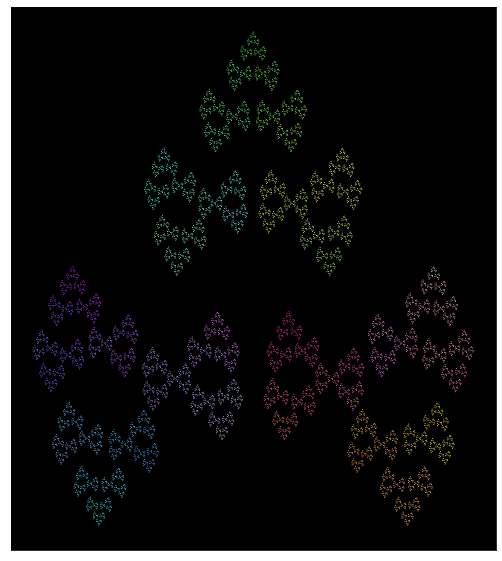

In [9]:
## this is where you set the "resolution" of the map. larger power of 3 means more dots
dot_pow = 8

## this controls the size of the dots. when you have lots of them it's a good idea to 
## make them smaller, otherwise they overlap and the fine structure is harder to see. 
## you should experiment and find ratios that you like :) 
dot_size = 1

domain = range(3**dot_pow)

## this is just a constant used in defining the map. this particular one worked well for me
## but you can change it if you like! it might make the code do funny things though as I 
## optimised around the value 1/2.02
sc = 1/2.02

X = []
Y = []
X_Phi = []
Y_Phi = []

## this bit collects all the colour data for the points and their images under phi. 
## you can replace the function Phi in this bit with any other function you like 
## and you'll get different images 
for i in domain:
    image = chis(i,sc)*1j/2.5
    X.append(np.real(image))
    Y.append(np.imag(image)-0.4)
    
    image_phi = chis(Qmod(Phi(fr(i,1),20),3**20),sc)*1j/2.5
    X_Phi.append(np.real(image_phi))
    Y_Phi.append(np.imag(image_phi)-0.4)

figure_normal, axes = plt.subplots()
axes.set_aspect( 1 )
axes.set_facecolor("black")
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])

## drawing the points we want to draw 
for i in range(len(X)):
    ptx = X[i]
    pty = Y[i]
    ptx_Phi = X_Phi[i]
    pty_Phi = Y_Phi[i]
        
    ## checks to see if this is one we want to draw 
    ## and gets the colour data of the point in question 
    colInfo1 = ptToCol([ptx,pty])
    colInfo2 = ptToCol([ptx_Phi,pty_Phi])
      
    if colInfo2[0]:
        ## in this line we choose to draw the dot with its x,y coords, but with the colour info from 
        ## phi. this is to visualise what phi does to 3-adic numbers 
        plt.scatter([ptx],[pty], dot_size, color = colInfo2[1], edgecolors = "none")
    else:
        plt.scatter([ptx_Phi],[pty_Phi], dot_size, color = "white" )
        
      

In [11]:
## use this command to save the output 
## there are often white boxes around outputs and I never figured out how to get rid of them 
## I just cropped them in an image editor. sorry for never bothering to fix that. 
figure_normal.savefig('Phi.png', dpi = 1000, bbox_inches='tight')

In [ ]:
### most everything below here is variations and tinkering;
### old versions, alternate implementations, and some junk that I wrote as I was working 
### it is not optimised for human use, suitable for easy consumption, 
### or generally well-commented at all. scroll further at your own caution .
### here be dragons 

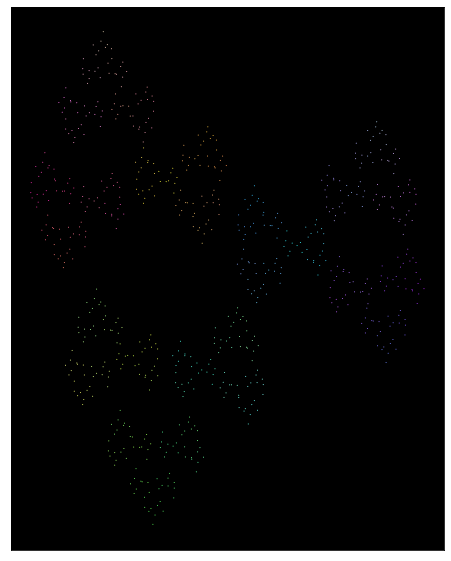

In [4]:
## 

domain = range(3**6)

sc = 1/2.02

X = []
Y = []
X_f = []
Y_f = []


def f(x):
    #return Qmod(Phi(fr(x,1),20),3**20)
    #return sig(fr(x,1))
    #return x
    #return S(x)
    return Qmod(fr(3*x-2,4),3**10)


for i in domain:
    image = chis(i,sc)*1j/2.5
    X.append(np.real(image))
    Y.append(np.imag(image)-0.4)
    
    image_f = chis(f(i),sc)*1j/2.5
    X_f.append(np.real(image_f))
    Y_f.append(np.imag(image_f)-0.4)

figure, axes = plt.subplots()
axes.set_aspect( 1 )
axes.set_facecolor("black")
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])


for i in range(len(X)):
    ptx = X[i]
    pty = Y[i]
    ptx_f = X_f[i]
    pty_f = Y_f[i]
        
    ## checks to see if this is one we want to draw 
    colInfo1 = ptToCol([ptx,pty])
    colInfo2 = ptToCol([ptx_f,pty_f])
      
    if colInfo2[0]:
        plt.scatter([ptx_f],[pty_f], 1, color = colInfo1[1], edgecolors = "none")
    else:
        plt.scatter([ptx_f],[pty_f], 1, color = "white", edgecolors = "none" )
        
      

In [15]:
figure.savefig('s0.png', dpi = 1000, bbox_inches='tight')

In [13]:
circle=plt.Circle((0,0),2)

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

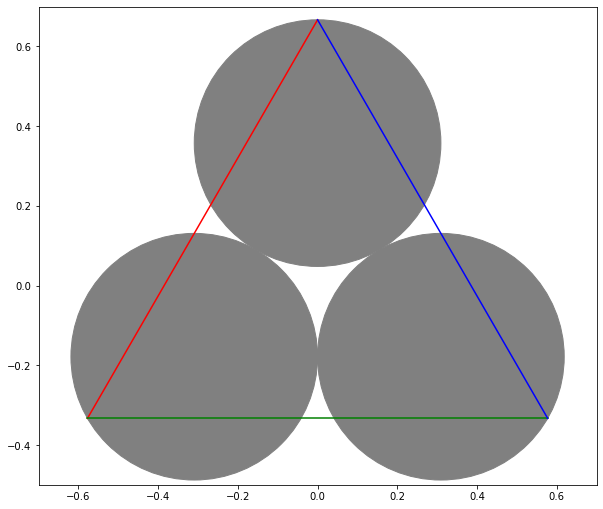

In [277]:
figure, axes = plt.subplots()
axes.set_aspect( 1 )


plt.xlim([-0.7,0.7])
plt.ylim([-0.5,0.7])

## line 1 - red opposite side 
x = [-1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "red")

## line 2 - green opposite side 
x = [-1/np.sqrt(3),1/np.sqrt(3)]
y = [-1/3,-1/3]
plt.plot(x, y, color = "green")

## line 3 - blue opposite side 
x = [1/np.sqrt(3),0]
y = [-1/3,2/3]

plt.plot(x, y, color = "blue")

## bottom left circle 
circ = plt.Circle(( 2-4/np.sqrt(3) , 2/np.sqrt(3)-4/3 ), 4/np.sqrt(3)-2, color = (0.5, 0.5, 0.5))
axes.add_artist( circ )

## bottom right circle 
circ = plt.Circle(( -2+4/np.sqrt(3) , 2/np.sqrt(3)-4/3 ), 4/np.sqrt(3)-2, color = (0.5, 0.5, 0.5))
axes.add_artist( circ )

## bottom right circle 
circ = plt.Circle(( 0 , 8/3 - 4/np.sqrt(3) ), 4/np.sqrt(3)-2, color = (0.5, 0.5, 0.5))
axes.add_artist( circ )


plt.show()

figure.savefig('tri_circ.png', transparent=True)

In [2]:
## distance to the red axis of pt 
def dr(pt):
    dist = -(-np.sqrt(3)*pt[0]+pt[1]-2/3)/2
    return dist

## distance to the green axis of pt 
def dg(pt):
    dist = pt[1]+1/3
    return dist

## distance to the blue axis of pt 
def db(pt):
    dist = -(np.sqrt(3)*pt[0]+pt[1]-2/3)/2
    return dist

## normalises to have a bit more variety in colours 
def normalise_var(cols):
    
    def normo(col):
        return min([col,1])
    
    return [normo(2.5*cols[i]) for i in range(3)]


def ptToCol(pt):
    rr = dr([pt[0],pt[1]])
    gg = dg([pt[0],pt[1]])
    bb = db([pt[0],pt[1]])
    
    colour = normalise_var([rr,gg,bb])
    return [rr >= 0 and gg >=0 and bb >=0, colour]
    

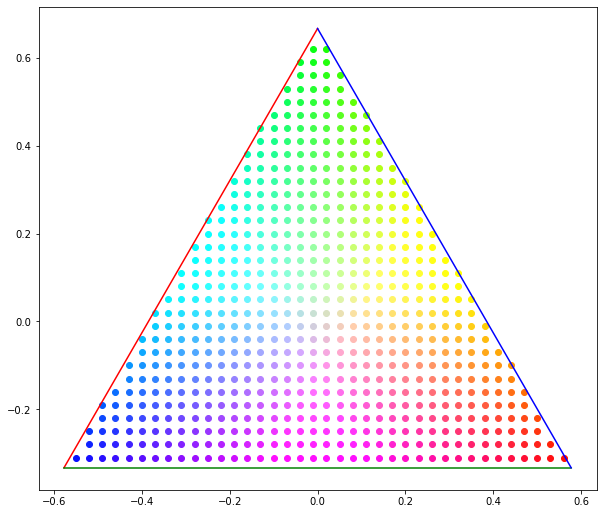

In [123]:
figure, axes = plt.subplots()
axes.set_aspect( 1 )


## line 1 - red opposite side 
x = [-1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "red")

## line 2 - green opposite side 
x = [-1/np.sqrt(3),1/np.sqrt(3)]
y = [-1/3,-1/3]
plt.plot(x, y, color = "green")

## line 3 - blue opposite side 
x = [1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "blue")



## now we ad a smattering of points to test colour functionality 

X,Y = np.mgrid[-0.7:0.7:0.03, -0.4:0.7:0.03]

for i in range(len(X)):
    for j in range(len(X[0])):
        
        ptx = X[i,j]
        pty = Y[i,j]
        
        ## checks to see if this is one we want to draw 
        colInfo= ptToCol([ptx,pty])
        
        if colInfo[0]:
            plt.scatter([ptx],[pty], color = colInfo[1])

In [103]:
normalise(colour)

[0.03605808375567654, 0.06999999999999978]

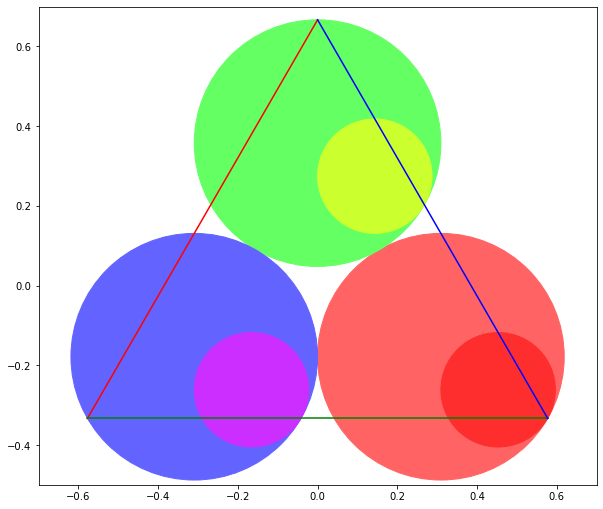

In [171]:
figure, axes = plt.subplots()
axes.set_aspect( 1 )

plt.xlim([-0.7,0.7])
plt.ylim([-0.5,0.7])


## line 1 - red opposite side 
x = [-1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "red")

## line 2 - green opposite side 
x = [-1/np.sqrt(3),1/np.sqrt(3)]
y = [-1/3,-1/3]
plt.plot(x, y, color = "green")

## line 3 - blue opposite side 
x = [1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "blue")


rad = 4/np.sqrt(3)-2

## bottom right circle [red]
c1 = [-2+4/np.sqrt(3) , 2/np.sqrt(3)-4/3]
col1 = ptToCol(c1)
circ = plt.Circle(c1, rad, color = col1[1])
axes.add_artist( circ )

## top right circle [green]
c2 = [0 , 8/3 - 4/np.sqrt(3) ]
col2 = ptToCol(c2)
circ = plt.Circle(c2, rad, color = col2[1])
axes.add_artist( circ )

## bottom left circle [blue]
c3 = [2-4/np.sqrt(3) , 2/np.sqrt(3)-4/3]
col3 = ptToCol(c3)
circ = plt.Circle(c3, rad, color = col3[1])
axes.add_artist( circ )




dd = 2*np.sqrt(3)-3

c4 = [c1[0] + c1[0]*dd , c1[1] + c1[1]*dd ]
col4 = ptToCol(c4)
circ = plt.Circle(c4, rad*dd, color = col4[1])
axes.add_artist( circ )


c5 = [c2[0] + c1[0]*dd , c2[1] + c1[1]*dd ]
col5 = ptToCol(c5)
circ = plt.Circle(c5, rad*dd, color = col5[1])
axes.add_artist( circ )


c6 = [c3[0] + c1[0]*dd , c3[1] + c1[1]*dd ]
col6 = ptToCol(c6)
circ = plt.Circle(c6, rad*dd, color = col6[1])
axes.add_artist( circ )



plt.show()

In [190]:

## shrinks the circle with cetnre cent1 and radius rad1 
## with respect to the circle with centre cent2 and radius rad2 
def shrinkCirc(circ1,circ2):
    
    ## this is our universal scaling factor 
    dd = 2*np.sqrt(3)-3
    
    cent1 = circ1[0]
    cent2 = circ2[0]
    
    new_cent = [cent1[0]*dd + cent2[0],cent1[1]*dd + cent2[1]]
    new_rad = circ1[1]*dd
    
    return [new_cent,new_rad]


def addCirc(axes,c):
    col = ptToCol(c[0])
    circ = plt.Circle(c[0], c[1], color = col[1])
    axes.add_artist( circ )
    return axes 

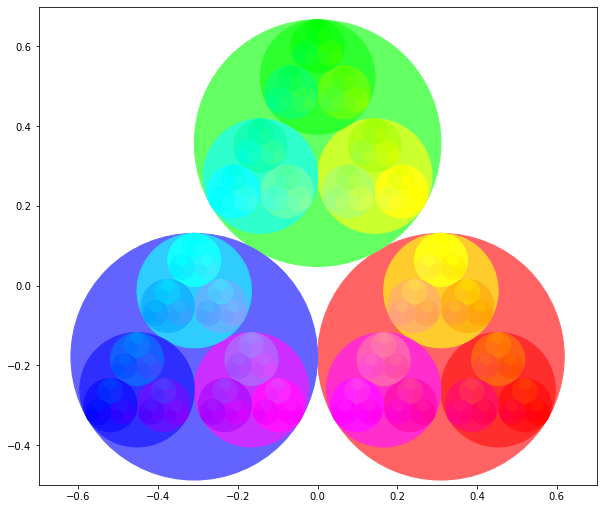

In [249]:
figure, axes = plt.subplots()
axes.set_aspect( 1 )

plt.xlim([-0.7,0.7])
plt.ylim([-0.5,0.7])

## line 1 - red opposite side 
#x = [-1/np.sqrt(3),0]
#y = [-1/3,2/3]
#plt.plot(x, y, color = "red")

## line 2 - green opposite side 
#x = [-1/np.sqrt(3),1/np.sqrt(3)]
#y = [-1/3,-1/3]
#plt.plot(x, y, color = "green")

## line 3 - blue opposite side 
#x = [1/np.sqrt(3),0]
#y = [-1/3,2/3]
#plt.plot(x, y, color = "blue")


rad = 4/np.sqrt(3)-2

## bottom right circle [red]
#c1 = [[-2+4/np.sqrt(3) , 2/np.sqrt(3)-4/3], rad]
#col1 = ptToCol(c1[0])
#circ = plt.Circle(c1[0], c1[1], color = col1[1])
#axes.add_artist( circ )


layer1 = [
    [[-2+4/np.sqrt(3) , 2/np.sqrt(3)-4/3], rad],
    [[0 , 8/3 - 4/np.sqrt(3) ], rad],
    [[2-4/np.sqrt(3) , 2/np.sqrt(3)-4/3], rad]
]


for i in range(3):
    axes = addCirc(axes,layer1[i])



layer2 = []

for i in range(3):
    for j in range(3):
        new_circ = shrinkCirc(layer1[i],layer1[j])
        layer2.append(new_circ)
        axes = addCirc(axes,new_circ)
        
layer3 = []
for i in range(9):
    for j in range(3):
        new_circ = shrinkCirc(layer2[i],layer1[j])
        layer3.append(new_circ)
        axes = addCirc(axes,new_circ)
        
layer4 = []
for i in range(len(layer3)):
    for j in range(3):
        new_circ = shrinkCirc(layer3[i],layer1[j])
        layer4.append(new_circ)
        axes = addCirc(axes,new_circ)
        
layer5 = []
for i in range(len(layer4)):
    for j in range(3):
        new_circ = shrinkCirc(layer4[i],layer1[j])
        layer5.append(new_circ)
        axes = addCirc(axes,new_circ)

plt.show()

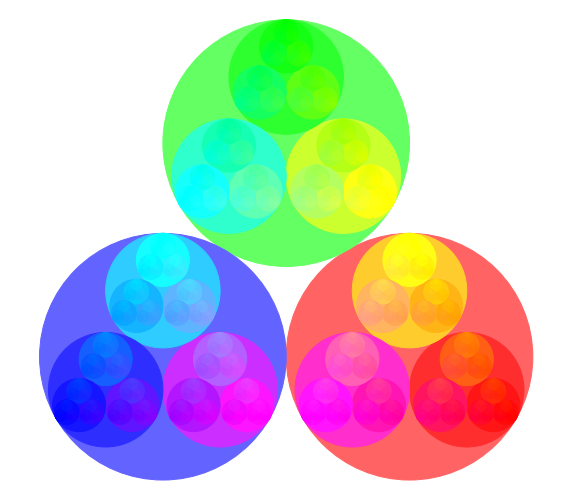

In [269]:
figure, axes = plt.subplots()
axes.set_aspect( 1 )

plt.xlim([-0.7,0.7])
plt.ylim([-0.5,0.7])


rad = 4/np.sqrt(3)-2

layers =[
    [
    [[-2+4/np.sqrt(3) , 2/np.sqrt(3)-4/3], rad],
    [[0 , 8/3 - 4/np.sqrt(3) ], rad],
    [[2-4/np.sqrt(3) , 2/np.sqrt(3)-4/3], rad]
    ]
]

for i in range(3):
    axes = addCirc(axes,layers[0][i])


for u in range(5):
    new_layer = []
    
    for i in range(len(layers[u])):
        for j in range(3):
            new_circ = shrinkCirc(layers[u][i],layers[0][j])
            new_layer.append(new_circ)
            axes = addCirc(axes,new_circ)

    layers.append(new_layer)


plt.axis("off")
plt.show()

In [270]:
figure.savefig('demo.png', transparent=True)

<Figure size 720x720 with 0 Axes>

In [279]:
## the old gods are dead
## from here we try Chistyakov 

In [285]:
np.real(np.exp(np.pi*1j))

-1.0

In [5]:
def chis(x,s):
    return sum([s**i * np.exp(2*np.pi*1j*x/3**i) for i in range(100)])

In [7]:
domain = range(3**7)

X = []
Y = []

for i in domain:
    image = chis(i,1/2.02)*1j/2
    X.append(np.real(image))
    Y.append(np.imag(image)-1/2.1)

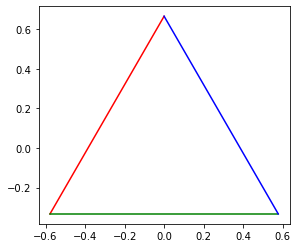

In [6]:
figure, axes = plt.subplots()
axes.set_aspect( 1 )
plt.scatter(X,Y, 1, color = "black")
## line 1 - red opposite side 
x = [-1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "red")

## line 2 - green opposite side 
x = [-1/np.sqrt(3),1/np.sqrt(3)]
y = [-1/3,-1/3]
plt.plot(x, y, color = "green")

## line 3 - blue opposite side 
x = [1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "blue")

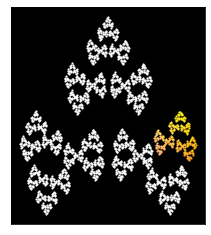

In [37]:
domain = range(3**7)

X = []
Y = []

for i in domain:
    image = chis(i,1/2.02)*1j
    X.append(np.real(image))
    Y.append(np.imag(image)-1)

figure, axes = plt.subplots()
axes.set_aspect( 1 )
axes.set_facecolor("black")
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])


for i in range(len(X)):
    ptx = X[i]
    pty = Y[i]
        
    ## checks to see if this is one we want to draw 
    colInfo= ptToCol([ptx/2,pty/3])
      
    if colInfo[0]:
        if i % 9 == 8:
            plt.scatter([ptx],[pty], 1.3, color = colInfo[1])
        else:
            plt.scatter([ptx],[pty], 1.3, color = "white")

In [38]:
figure.savefig('9_8.png', dpi = 300, bbox_inches='tight')

In [3]:
def Qmod(x,n):
    a = x.numerator
    b = x.denominator
    r = pow(b,-1,n)
    return (a*r) % n

def Exp3(x,d):
    exp = [Qmod(x,3)]
    r = exp[0]
    for i in range(d-1):
        x = (x-fr(r))/3
        r = Qmod(x,3)
        exp.append(r)
    return exp

def ExpToN(x):
    val = 0
    for i in range(len(x)):
        val += x[i]*3**i
    return val


def Phi(x,d):
    A = [fr(4,3),fr(2,3),fr(4,3)]
    B = [fr(0,1),fr(1,3),fr(-2,3)]
    
    e = Exp3(x,d)
    L = []
    
    for i in range(1,d):
        ee = [e[j] for j in range(i)]
        denom = [A[j] for j in ee]
        prod = fr(1)
        for u in denom:
            prod = prod*u
        doot = B[ee[i-1]]/prod
        L.append(doot)
        
    ss = fr(0)
    for u in L:
        ss += u
    return -ss

def sig(x):
    r = Qmod(x,3)
    if r == 0:
        return 4*x/3
    elif r == 1:
        return (2*x+1)/3
    else:
        return (4*x-2)/3
    
def PhiI(x,d):
    val = 0
    im = x
    
    for i in range(d):
        val += Qmod(im,3)*3**i
        im = sig(im)
    return val

In [585]:
PhiI(fr(10,1),10)

44896

In [ ]:
[ 1, 0, 2, 2, 0, 1, 0, 1, 0, 0 ]


In [498]:
Exp3(fr(1,4),20)

[1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2]

In [568]:
domain = range(3**7)

sc = 1/1.202

X = []
Y = []

X_Phi = []
Y_Phi = []

for i in domain:
    image = chis(i,sc)*1j
    image_phi = chis(Qmod(Phi(fr(i,1),20),3**20),sc)*1j
    
    X.append(np.real(image))
    Y.append(np.imag(image)-1)
    
    X_Phi.append(np.real(image_phi))
    Y_Phi.append(np.imag(image_phi)-1)

In [4]:
domain = range(3**7)

X = []
Y = []

for i in domain:
    image = chis(i,1/2.02)*1j/2.3
    X.append(np.real(image))
    Y.append(np.imag(image)-0.4)

figure, axes = plt.subplots()
axes.set_aspect( 1 )
axes.set_facecolor("black")
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])


for i in range(len(X)):
    ptx = X[i]
    pty = Y[i]
        
    ## checks to see if this is one we want to draw 
    colInfo= ptToCol([ptx,pty])
      
    if colInfo[0]:
        plt.scatter([ptx],[pty], 1.3, color = colInfo[1])
        
## line 1 - red opposite side 
x = [-1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "red")

## line 2 - green opposite side 
x = [-1/np.sqrt(3),1/np.sqrt(3)]
y = [-1/3,-1/3]
plt.plot(x, y, color = "green")

## line 3 - blue opposite side 
x = [1/np.sqrt(3),0]
y = [-1/3,2/3]
plt.plot(x, y, color = "blue")

NameError: name 'chis' is not defined

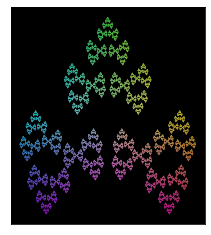

In [6]:
domain = range(3**10)

sc = 1/2.02

X = []
Y = []
X_Phi = []
Y_Phi = []

for i in domain:
    image = chis(i,sc)*1j/2.5
    X.append(np.real(image))
    Y.append(np.imag(image)-0.4)
    
    image_phi = chis(Qmod(Phi(fr(i,1),20),3**20),sc)*1j/2.5
    X_Phi.append(np.real(image_phi))
    Y_Phi.append(np.imag(image_phi)-0.4)

figure_normal, axes = plt.subplots()
axes.set_aspect( 1 )
axes.set_facecolor("black")
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])


for i in range(len(X)):
    ptx = X[i]
    pty = Y[i]
    ptx_Phi = X_Phi[i]
    pty_Phi = Y_Phi[i]
        
    ## checks to see if this is one we want to draw 
    colInfo1 = ptToCol([ptx,pty])
    colInfo2 = ptToCol([ptx_Phi,pty_Phi])
      
    if colInfo2[0]:
        plt.scatter([ptx],[pty], 0.1, color = colInfo1[1], edgecolors = "none")
    else:
        plt.scatter([ptx_Phi],[pty_Phi], 0.1, color = "white" )
        
      

In [9]:
figure_normal.savefig('Z3.png', dpi = 1000, bbox_inches='tight')

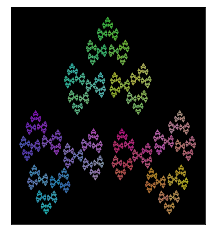

In [716]:
domain = range(3**10)

sc = 1/2.02

X = []
Y = []
X_Phi = []
Y_Phi = []

for i in domain:
    image = chis(i,sc)*1j/2.5
    X.append(np.real(image))
    Y.append(np.imag(image)-0.4)
    
    image_phi = chis(Qmod(Phi(fr(i,1),20),3**20),sc)*1j/2.5
    X_Phi.append(np.real(image_phi))
    Y_Phi.append(np.imag(image_phi)-0.4)

figure, axes = plt.subplots()
axes.set_aspect( 1 )
axes.set_facecolor("black")
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])


for i in range(len(X)):
    ptx = X[i]
    pty = Y[i]
    ptx_Phi = X_Phi[i]
    pty_Phi = Y_Phi[i]
        
    ## checks to see if this is one we want to draw 
    colInfo1 = ptToCol([ptx,pty])
    colInfo2 = ptToCol([ptx_Phi,pty_Phi])
      
    if colInfo2[0]:
        plt.scatter([ptx],[pty], 0.1, color = colInfo2[1], edgecolors = "none")
    else:
        plt.scatter([ptx_Phi],[pty_Phi], 0.1, color = "white" )
        
        


In [8]:
figure_normal.savefig('phi_10.png', dpi = 1000, bbox_inches='tight')

NameError: name 'figure' is not defined

In [688]:
[chis(Qmod(Phi(fr(50,1),20),3**i),sc) for i in range(10)]

[(5.950494988676561+0j),
 (4.063038521314883+0.32209259884056873j),
 (3.700996634399169-0.2217189564788647j),
 (3.743558406676202-0.5156171890023196j),
 (3.851115855772459-0.6870270483198979j),
 (3.851115855772459-0.6870270483198979j),
 (3.851115855772459-0.6870270483198979j),
 (3.271446475919852-0.6839560175376473j),
 (3.271446475919852-0.6839560175376473j),
 (3.271446475919852-0.6839560175376473j)]

Y

In [695]:
sc = 1/(1.202)

In [696]:
sc

0.831946755407654

In [562]:
chis(Qmod(Phi(fr(10,1),10),3**10),sc)

(484278685.5928965+10.763233553237043j)

In [591]:
Y_Phi[10]

-0.408919331414221

In [592]:
Y[10]

-0.042327697116742

In [661]:
z = chis(Qmod(Phi(100,20),3**20),1/2)/2

In [662]:
ptToCol([np.real(z)/2,np.imag(z)/3])

[True, [1, 0.9807480068297558, 0.4091519656524467]]